In [300]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import train_test_split

device = "cuda"
torch.device(device=device)

torch.manual_seed(42)
torch.cuda.manual_seed(42)
device

'cuda'

In [301]:
LEARNING_RATE = 0.002
HIDDEN_UNITS = 32

In [302]:
data = None
with open('data.json', 'r') as f:
    data = json.load(f)
data[0], len(data[0][0])

([[[0.45497363805770874,
    0.40181559324264526,
    -0.10442516207695007,
    0.9964860677719116],
   [0.46596378087997437,
    0.3687018156051636,
    -0.14153742790222168,
    0.9968416690826416],
   [0.47041770815849304,
    0.36795997619628906,
    -0.141709566116333,
    0.9973503351211548],
   [0.4751827120780945,
    0.3672834634780884,
    -0.14179515838623047,
    0.9976590871810913],
   [0.4611609876155853,
    0.3686749339103699,
    -0.0905613824725151,
    0.9964673519134521],
   [0.46208521723747253,
    0.3676823377609253,
    -0.09063052386045456,
    0.9964346885681152],
   [0.46336010098457336,
    0.36653953790664673,
    -0.09079504758119583,
    0.9968423843383789],
   [0.50380539894104,
    0.3792932629585266,
    -0.2224762737751007,
    0.9974061846733093],
   [0.4925134778022766,
    0.37584102153778076,
    0.0051500811241567135,
    0.9974742531776428],
   [0.4672686755657196,
    0.43053245544433594,
    -0.12731407582759857,
    0.9970880150794983],
   [0

In [303]:
landmarks = []
labels = []
for pose in data:
  landmarks.append(pose[0])
  labels.append(pose[1])

In [304]:
landmarks = torch.tensor(landmarks, dtype=torch.float).to(device=device)
labels = torch.tensor(labels, dtype=torch.long).to(device=device)
landmarks[0], labels[0]

(tensor([[ 0.4550,  0.4018, -0.1044,  0.9965],
         [ 0.4660,  0.3687, -0.1415,  0.9968],
         [ 0.4704,  0.3680, -0.1417,  0.9974],
         [ 0.4752,  0.3673, -0.1418,  0.9977],
         [ 0.4612,  0.3687, -0.0906,  0.9965],
         [ 0.4621,  0.3677, -0.0906,  0.9964],
         [ 0.4634,  0.3665, -0.0908,  0.9968],
         [ 0.5038,  0.3793, -0.2225,  0.9974],
         [ 0.4925,  0.3758,  0.0052,  0.9975],
         [ 0.4673,  0.4305, -0.1273,  0.9971],
         [ 0.4614,  0.4322, -0.0613,  0.9933],
         [ 0.5282,  0.5542, -0.3417,  0.9962],
         [ 0.5174,  0.5378,  0.1624,  0.9910],
         [ 0.4037,  0.7270, -0.3720,  0.9829],
         [ 0.4990,  0.7079,  0.3016,  0.0581],
         [ 0.2496,  0.7240, -0.2466,  0.9607],
         [ 0.4708,  0.8202,  0.2938,  0.0619],
         [ 0.2057,  0.7512, -0.2833,  0.9475],
         [ 0.4713,  0.8505,  0.3012,  0.0787],
         [ 0.1976,  0.7324, -0.2591,  0.9493],
         [ 0.4695,  0.8383,  0.2614,  0.0816],
         [ 0.

In [305]:
X_train, X_test, Y_train, Y_test = train_test_split(landmarks,
                                                    labels,
                                                    test_size=0.1,
                                                    random_state=42)
Y_train = Y_train.to(device)
Y_test = Y_test.to(device)

X_train[0]

tensor([[ 6.0250e-01,  1.6727e-01, -6.8490e-01,  9.9973e-01],
        [ 5.9902e-01,  1.0687e-01, -6.1972e-01,  9.9929e-01],
        [ 6.0531e-01,  1.0729e-01, -6.1963e-01,  9.9938e-01],
        [ 6.1074e-01,  1.0761e-01, -6.1963e-01,  9.9942e-01],
        [ 5.6670e-01,  1.0544e-01, -6.9195e-01,  9.9935e-01],
        [ 5.4912e-01,  1.0594e-01, -6.9207e-01,  9.9939e-01],
        [ 5.2903e-01,  1.0697e-01, -6.9247e-01,  9.9931e-01],
        [ 5.6801e-01,  1.4479e-01, -3.4747e-01,  9.9952e-01],
        [ 4.6859e-01,  1.4294e-01, -6.5422e-01,  9.9969e-01],
        [ 6.0467e-01,  2.5077e-01, -5.8702e-01,  9.9986e-01],
        [ 5.6339e-01,  2.5049e-01, -6.7493e-01,  9.9990e-01],
        [ 6.4910e-01,  6.2519e-01, -1.5255e-01,  9.9898e-01],
        [ 2.6221e-01,  5.9242e-01, -7.2429e-01,  9.9866e-01],
        [ 7.1213e-01,  1.0620e+00, -2.3510e-02,  3.8240e-01],
        [ 2.0682e-01,  1.1385e+00, -6.7991e-01,  5.1860e-01],
        [ 7.1690e-01,  1.4073e+00, -1.7730e-01,  5.0210e-02],
        

In [306]:
X_test = X_test.view(X_test.size(0), -1)
X_train = X_train.view(X_train.size(0), -1)

In [307]:
model_0 = nn.Sequential(
  nn.Linear(132, HIDDEN_UNITS),
  nn.ReLU(),
  nn.Linear(HIDDEN_UNITS, HIDDEN_UNITS),
  nn.ReLU(),
  nn.Linear(HIDDEN_UNITS, 2)
).to(device=device)
model_0

Sequential(
  (0): Linear(in_features=132, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=2, bias=True)
)

In [308]:
def accuracy_fn(y_true, y_preds):
  correct = torch.eq(y_true, y_preds).sum().item()
  return (correct / len(y_preds)) * 100

In [309]:
loss_fn = nn.CrossEntropyLoss().to(device=device)
optimizer = torch.optim.SGD(model_0.parameters(), lr=LEARNING_RATE)

In [310]:
def logits_to_labels(y_logits):
  y_pred_probs = torch.softmax(y_logits, dim=1)
  y_preds = torch.argmax(y_pred_probs, dim=1)
  return y_preds

In [311]:
X_train[:1], X_test[:1]

(tensor([[ 6.0250e-01,  1.6727e-01, -6.8490e-01,  9.9973e-01,  5.9902e-01,
           1.0687e-01, -6.1972e-01,  9.9929e-01,  6.0531e-01,  1.0729e-01,
          -6.1963e-01,  9.9938e-01,  6.1074e-01,  1.0761e-01, -6.1963e-01,
           9.9942e-01,  5.6670e-01,  1.0544e-01, -6.9195e-01,  9.9935e-01,
           5.4912e-01,  1.0594e-01, -6.9207e-01,  9.9939e-01,  5.2903e-01,
           1.0697e-01, -6.9247e-01,  9.9931e-01,  5.6801e-01,  1.4479e-01,
          -3.4747e-01,  9.9952e-01,  4.6859e-01,  1.4294e-01, -6.5422e-01,
           9.9969e-01,  6.0467e-01,  2.5077e-01, -5.8702e-01,  9.9986e-01,
           5.6339e-01,  2.5049e-01, -6.7493e-01,  9.9990e-01,  6.4910e-01,
           6.2519e-01, -1.5255e-01,  9.9898e-01,  2.6221e-01,  5.9242e-01,
          -7.2429e-01,  9.9866e-01,  7.1213e-01,  1.0620e+00, -2.3510e-02,
           3.8240e-01,  2.0682e-01,  1.1385e+00, -6.7991e-01,  5.1860e-01,
           7.1690e-01,  1.4073e+00, -1.7730e-01,  5.0210e-02,  2.9788e-01,
           1.4992e+00, -7

In [312]:
# Let's get some raw outputs of our model (logits)
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device=device))

y_logits[:5]

tensor([[-0.2777,  0.1344],
        [-0.3072,  0.1519],
        [-0.3082,  0.1338],
        [-0.2954,  0.1430],
        [-0.3438,  0.2145]], device='cuda:0')

In [313]:
accuracy_fn(y_true=Y_test, y_preds=torch.argmax(torch.softmax(y_logits, dim=1), dim=1))

50.0

In [314]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 15000
train_losses = []
test_losses = []

# GIMME THE DATA
X_train, Y_train = X_train.to(device=device), Y_train.to(device=device)
X_test, Y_test = X_test.to(device=device), Y_test.to(device=device)

previous_test_loss = 100
for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train.to(device=device))
  y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, Y_train)
  train_losses.append(loss)
  accuracy = accuracy_fn(y_true=Y_train,
                         y_preds=y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, Y_test)
    test_losses.append(test_loss)
    test_accuracy = accuracy_fn(y_true=Y_test,
                                y_preds=test_preds)
    if test_loss > previous_test_loss and test_accuracy >= 80:
      break
    previous_test_loss = test_loss

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss:.4f} | Train accuracy: {accuracy:.2f}% | Test loss: {test_loss:.4f} | Test accuracy: {test_accuracy:.2f}%")

Epoch: 0 | Train loss: 0.7236 | Train accuracy: 50.00% | Test loss: 0.7332 | Test accuracy: 50.00%
Epoch: 10 | Train loss: 0.7208 | Train accuracy: 50.00% | Test loss: 0.7305 | Test accuracy: 50.00%
Epoch: 20 | Train loss: 0.7183 | Train accuracy: 50.00% | Test loss: 0.7280 | Test accuracy: 50.00%
Epoch: 30 | Train loss: 0.7160 | Train accuracy: 50.00% | Test loss: 0.7257 | Test accuracy: 50.00%
Epoch: 40 | Train loss: 0.7140 | Train accuracy: 50.00% | Test loss: 0.7236 | Test accuracy: 50.00%
Epoch: 50 | Train loss: 0.7122 | Train accuracy: 50.00% | Test loss: 0.7218 | Test accuracy: 50.00%
Epoch: 60 | Train loss: 0.7107 | Train accuracy: 50.00% | Test loss: 0.7201 | Test accuracy: 50.00%
Epoch: 70 | Train loss: 0.7094 | Train accuracy: 50.00% | Test loss: 0.7187 | Test accuracy: 50.00%
Epoch: 80 | Train loss: 0.7082 | Train accuracy: 50.00% | Test loss: 0.7174 | Test accuracy: 50.00%
Epoch: 90 | Train loss: 0.7071 | Train accuracy: 50.00% | Test loss: 0.7162 | Test accuracy: 50.00%
E

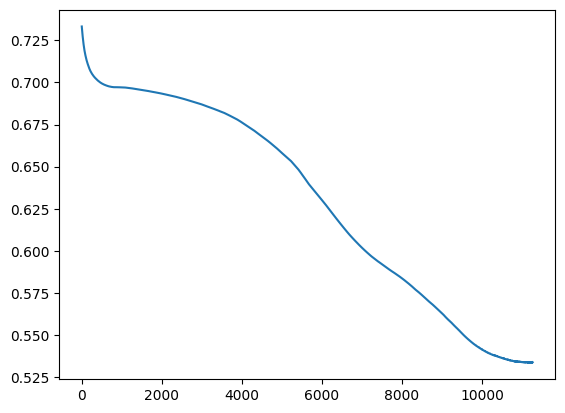

In [316]:
import matplotlib.pyplot as plt
test_losses = [x.detach().cpu().numpy() for x in test_losses]
plt.plot(test_losses)

In [ ]:
torch.save(model_0.state_dict(), 'model_0_state_dict.pth')
torch.save(model_0, 'model_0.pth')

In [ ]:
# Let's get some raw outputs of our model (logits)
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device=device))

y_logits[:5]

tensor([[-0.5998,  0.4919],
        [-2.8339,  2.8714],
        [ 2.1102, -2.4041],
        [-1.7744,  1.6995],
        [ 3.5863, -4.0410]], device='cuda:0')

In [ ]:
y_preds_probs = torch.softmax(y_logits, dim=1)
y_preds_probs

tensor([[2.5130e-01, 7.4870e-01],
        [3.3173e-03, 9.9668e-01],
        [9.8917e-01, 1.0832e-02],
        [3.0064e-02, 9.6994e-01],
        [9.9951e-01, 4.8675e-04],
        [9.9931e-01, 6.8853e-04],
        [5.7241e-01, 4.2759e-01],
        [1.1680e-01, 8.8320e-01],
        [4.7375e-02, 9.5263e-01],
        [9.6932e-01, 3.0677e-02]], device='cuda:0')

In [ ]:
values = set()
for probs in y_preds_probs:
  values.add(torch.argmax(probs).item())
  print(torch.argmax(probs))
values

tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(0, device='cuda:0')
tensor(1, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(0, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(0, device='cuda:0')


{0, 1}